---

# TP 1 : Interpolation polynômiale

<b>Polytech Sorbonne, Main 3</b><br>
Analyse numérique et EDO<br>
Auteur : Fabien Vergnet

---

## Table des matières

- [Exercice 1 : Interpolation de Lagrange par inversion de système linéaire](#invsyslin)
- [Exercice 2 : Interpolation de Lagrange par différences divisées](#diffdiv)
- [Exercice 3 : Interpolation de Hermite](#hermite)
- [Exercice 4 : Points de Tchebychev vs points équidistants](#tcheby)
- [Exercice 5 : Phénomène de Runge](#runge)

In [1]:
import numpy as np                # Librairie pour le calcul scientifique
import matplotlib.pyplot as plt   # Librairie graphique


<a id="invsyslin"></a>
## Exercice 1 : Interpolation de Lagrange par inversion de système linéaire
1. Définir une fonction `polyval` qui prend en argument :
 - un vecteur de points de taille $n$, $x = (x_i)_{0 \leq i < n}$,
 - un tableau de coefficients polynômiaux de taille $m$, $a = (a_i)_{0\leq i < m}$, 
 
  et qui retourne un tableau de taille $n$ contenant les évaluations aux points $(x_i)_{0\leq i\leq n}$ du polynôme $p$ défini par $$ p(x) = a_0 + a_1 x + \dots + a_m x^m, ~~~~\forall x\in\mathbb{R}.$$

  Tester la fonction en traçant sur la même figure les graphes des polynômes $p_1(x)= 5*x^2 + 2$ et $p_2(x)= 0.1*x^4 + 3x^2$ sur l'intervalle $[-10,10]$.

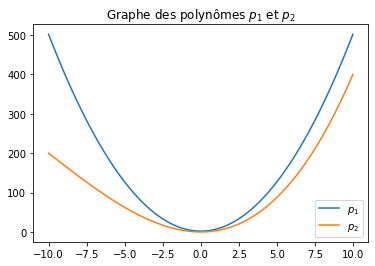

7.84 ms ± 66.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.1 µs ± 96.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [30]:
def polyval(x,a):
    y = np.zeros(x.size)
    for i in range(a.size):
        for j in range(x.size):
            y[j] += a[i]*x[j]**i
    return y

# Pour vérifier la fonction polyval, je trace les graphes de polynomes p_1 et p_2.
# Je n'oublie pas d'ajouter un titre et une légende

x = np.linspace(-10,10,100)
p1 = polyval(x,np.array([2,0,5]))
p2 = polyval(x,np.array([0,0,3,0.1]))
plt.plot(x,p1,label='$p_1$')
plt.plot(x,p2, label='$p_2$')
plt.legend(loc='lower right')
plt.title("Graphe des polynômes $p_1$ et $p_2$")
plt.show()

# On peut également définir une version vectorielle pour cette fonction
def polyvalVec(x,a):
    y = np.zeros(x.size)
    for i in range(a.size):
        y += a[i]*x**i
    return y

# A titre d'information, on peut comparer les vitesses d'éxecution des deux fonctions
x2 = np.linspace(0,1,1000)
%timeit polyval(x2,np.array([2,0,5]))
%timeit polyvalVec(x2,np.array([2,0,5]))

2. Définir une fonction `buildmatrix` qui à partir d’un vecteur de points de taille $n + 1$, $\xi = (\xi_i)_{0\leq i \leq n}$, et retourne la matrice $V$ trouvée dans l’exercice 3 de la feuille de TD 1.

In [32]:
def buildmatrix(xi):
    V = np.zeros((xi.size,xi.size))
    for i in range(xi.size):
        for j in range(xi.size):
            V[i,j] = xi[i]**j
    return V

# On peut également définir une version "à la numpy" pour la fonction buildmatrix
def buildmatrixNumpy(xi):
    V = np.array([[xi[i]**j for j in range(xi.size)] for i in range(xi.size)])
    return V

# Je teste ces deux fonctions
xi = np.array([1,2,3])
v = buildmatrix(xi)
print(v)
v = buildmatrixNumpy(xi)
print(v)

# A titre d'information, on peut comparer les vitesses d'éxecution des deux fonctions
xi2 = np.linspace(0,1,1000)
%timeit buildmatrix(xi2)
%timeit buildmatrixNumpy(xi2)

[[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]
[[1 1 1]
 [1 2 4]
 [1 3 9]]
547 ms ± 3.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
500 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


3. Définir une fonction `solvelagrangesystem` qui à partir de deux vecteurs $\xi$ et $y$ (de même taille $n+1$) calcule les coefficients polynomiaux du polynôme $p_n$ d’interpolation de Lagrange aux points $(\xi_i, y_i)$ pour tout $i \in \{0,\dots,n\}$. 

  On pourra utiliser la fonction `np.linalg.solve(V,y)` pour mettre en oeuvre la résolution du système linéaire $Va = y$, où $a$ est le tableau contenant les coefficients polynomiaux de $p_n$.

In [33]:
def solvelagrangesystem(xi,y):
    V = buildmatrix(xi)
    a = np.linalg.solve(V,y)
    return a

# Pour tester la fonction, je choisi un vecteur y aléatoirement avec la fonction np.random.rand
y = np.random.rand(xi.size)
# J'appelle la fonction solvelagrangesystem
a = solvelagrangesystem(xi,y)
# Pour vérifier le résultat, je check que le polynome obtenu vaut bien y[i] au point x[i]
# Pour cela j'utilise la fonction polyval et la fonction np.allclose qui rend "True" si l'élément p[i] du vecteur p ci-dessous est égal à y[i] (à l'erreur machine près) 
p = polyval(xi,a)
print(np.allclose(p,y))

True


4. Soit $f$ une fonction de $\mathbb{R}$ dans $\mathbb{R}$. En utilisant les fonctions Python `solvelagrangesystem` et `polyval`, définir une fonction `lagrangeinterp` qui prend en argument :
  - un vecteur de points d'interpolations de taille $n+1$, $\xi = \xi_{1 \leq n+1}$,
  - le vecteur des valeurs de la fonction $f$ aux points d'interpolation, de taille $n+1$, $y = (f(\xi_i))_{1\leq i \leq n+1}$,
  - un vecteur de points de taille $m$, $x=(x_i)_{1\leq i \leq m}$,
 
  et qui retourne le vecteur de taille $m$ contenant les valeurs du polynôme interpolateur de Newton aux points d'interpolation $(\xi_i)$, évalué aux points $(x_i)$.

In [44]:
def lagrangeinterp(xi,y,x):
    a = solvelagrangesystem(xi,y)
    p = polyval(x,a)
    return p

# Pour tester cette fonction, je vais interpoler la fonction f(x)=3*x+2 aux points -1 et 1
# Comme f est un polynome de degré 1, son polynome interpolateur de Lagrange en deux points et aussi un polynome de degré 1
# Le polynome interpolateur de Lagrange est donc forcément égal à f
xi = np.array([-1,1])
y = 3*xi+2
x = np.linspace(0,1,100)
p = lagrangeinterp(xi,y,x)
# Et on vérifie que p[i] et bien égal à 3*x[i]+2 pour tout i
print(np.allclose(p,3*x+2))


True


5. Soit $f(x) = sin(2x^2)$. Déterminer le polynôme d'interpolation de Lagrange de $f$ pour $n+1$ points uniformément répartis sur $[0, 1]$. 

  Tracer sur une même figure les graphes de la fonction $f$ et du polynôme $p_n$ en les évaluant sur un maillage plus fin (prendre par exemple $4(n+1)$ points). 
  
  Faire varier le nombre de points $n$ pour comparer. Prendre, par exemple $n=2$, $n=3$, $n=4$.

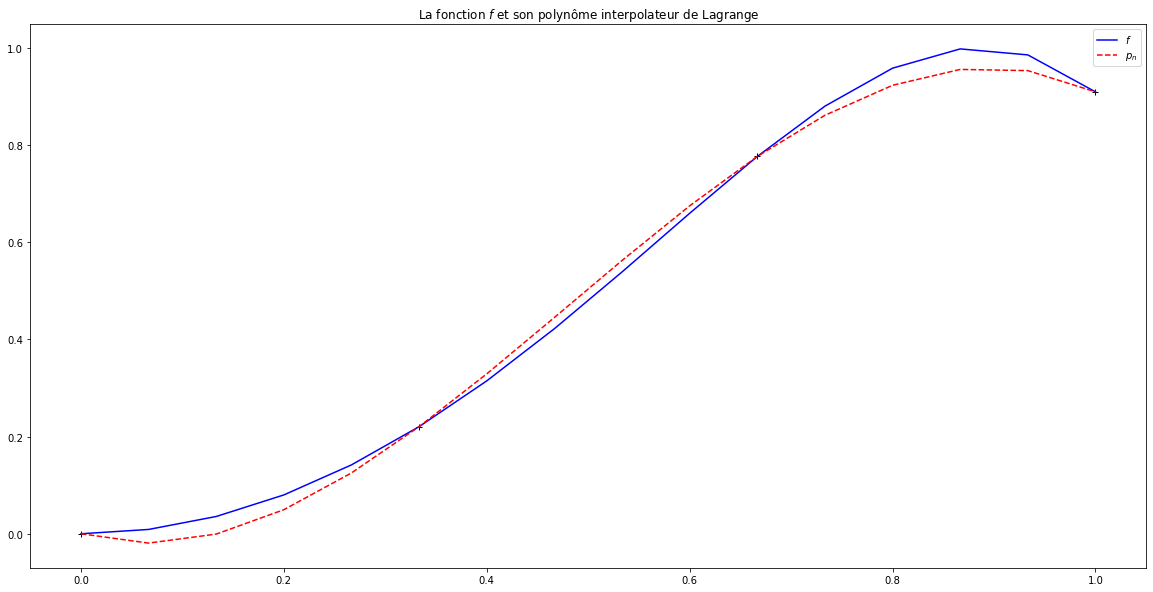

In [43]:
N = 3
xi = np.linspace(0,1,N+1)

def f(x):
    return np.sin(2*x**2)

x = np.linspace(0,1,4*(N+1))
p = lagrangeinterp(xi,f(xi),x)

plt.figure(figsize=[20,10])
plt.plot(xi,f(xi),'k+')
plt.plot(x,f(x),'b-',label='$f$')
plt.plot(x,p,'r--',label='$p_n$')
plt.title("La fonction $f$ et son polynôme interpolateur de Lagrange")
plt.legend()
plt.show()

# Je n'oublie par donner un titre et une légende à ma figure

<a id="diffdiv"></a>
## Exercice 2 : Interpolation de Lagrange par différences divisées

Dans cet exercice, on veut construire un script d’interpolation mettant en oeuvre la formule de Newton pour le calcul des coefficients du polynôme d’interpolation de Lagrange $p_n$ d’une fonction $f$ aux points $(\xi_i)_{1 \leq i \leq n+1}$, et l’algorithme d’Horner pour l’évaluation de celui-ci.

1. Définir une fonction `diffdiv` qui, à partir d’un vecteur $\xi = (\xi_i)$ et un vecteur $y = (f(\xi_i))_{1\leq i \leq n+1}$ rend un vecteur $d = (d_i)_{1 \leq i \leq n+1}$, avec $d_i = f[\xi_1, \dots , \xi_i]$. On rappelle l’algorithme vu en cours :

    - pour $i$ de 1 à $n+1$ : $d_i = f(\xi_i)$,
    - pour $k$ de 2 à $n+1$ :
        - pour i de $n+1$ à $k$ : $d_i \leftarrow \dfrac{d_i - d_{i-1}}{\xi_i - \xi_{i-k}}$.  
        
  Pour tester la fonction, on pourra (à la main) construire le polynôme d'interpolation de Newton aux points $\{(0,1),(2,5),(4,17)\}$.
        
  **Attention, on rappelle que les indices des tableaux commence à 0 en Python !**

In [ ]:
def diffdiv(xi,y):


2. Définir une fonction `Horner0` qui prend en argument :
 - un vecteur de coefficients de taille $n+1$, $d = (d_i)_{1\leq i \leq n+1}$ (les différences divisées),
 - un vecteur de points d'interpolation de taille $n+1$, $\xi = (\xi_i)_{1\leq i \leq n+1}$,
 - un réel $x$,
 
 et qui retourne la valeur du polynôme $p_n$ d'interpolation de Newton aux points $(\xi_i)$, évalué aux point $x$, en utilisant l'algorithme de Horner vu en cours :
 
 - On pose $p = d_{n+1}$,
 - Pour $k$ allant de $n$ à 1 :
     $p \leftarrow d_k + (x-\xi_k)p$.

In [ ]:
def Horner0(d,xi,x):


3. Définir une fonction `Horner` qui étend la fonction Horner0 lorsque $x$ est un vecteur. La fonction rendra donc un vecteur de même taille que $x$.

In [ ]:
def Horner(d,xi,x):


4. Soit $f$ un fonction de $\mathbb{R}$ dans $\mathbb{R}$. À partir des fonctions Python précédentes, définir une fonction `interpnewton` qui prend en argument :
 - un vecteur de points d'interpolations de taille $n+1$, $\xi = \xi_{1 \leq n+1}$,
 - le vecteur des valeurs de la fonction $f$ aux points d'interpolation, de taille $n+1$, $y = (f(\xi_i))_{1\leq i \leq n+1}$,
 - un vecteur de points de taille $m$, $x=(x_i)_{1\leq i \leq m}$,
 
 et qui retourne le vecteur de taille $m$ contenant les valeurs du polynôme interpolateur de Newton aux points d'interpolation $(\xi_i)$, évalué aux points $(x_i)$.

In [ ]:
def newtoninterp(xi,y,x):


5. Tester cet algorithme pour interpoler une fonction de votre choix (voir exercice 1 par exemple).

6. Comparer la performance de cet algorithme avec la méthode utilisée dans l’exercice 1 (par résolution de système linéaire). On pourra utiliser la syntaxe `%timeit` en début de ligne pour obtenir le temps d'évaluation des commandes.

In [ ]:
%timeit p = newtoninterp(xi,y,x)

In [ ]:
%timeit p = lagrangeinterp(xi,y,x)

<a id="hermite"></a>
## Exercice 3 : Interpolation de Hermite

1. Déterminer (à la main) les polynômes $h_0$, $h_1$, $h_2$, $h_3$ vérifiant

  $$h_0(0)=1, ~ h_0^{\prime}(0) = 0, ~ h_0(1) = 0, ~ h_0^{\prime}(1) = 0,$$ 

  $$h_1(0)=0, ~ h_1^{\prime}(0) = 1, ~ h_1(1) = 0, ~ h_1^{\prime}(1) = 0,$$ 

  $$h_2(0)=0, ~ h_2^{\prime}(0) = 0, ~ h_2(1) = 1, ~ h_2^{\prime}(1) = 0,$$ 

  $$h_3(0)=0, ~ h_3^{\prime}(0) = 0, ~ h_3(1) = 0, ~ h_3^{\prime}(1) = 1.$$ 

  Définir ensuite les fonctions Python correspondantes.

2. On considère une fonction $f$ de classe $\mathcal{C}^1$ sur $[0,1]$. Montrer que le polynôme $q$ de $\mathcal{P}^3$ vérifiant

  $$q(0) = f(0), ~~~~~q^\prime(0) = f^\prime(0), ~~~~~q(1) = f(1), ~~~~~q^\prime(1) = f^\prime(1),$$

  s'écrit sous la forme $$q(x) = f(0)h_0(x) + f^\prime(0)h_0(x) + f(1)h_2(x) + f^\prime(1)h_3(x).$$
  
3. Définir une fonction `hermiteinterp` qui prend en argument :
  - une fonction $f$,
  - sa dérivée $f^\prime$,
  - un vecteur de points $x = (x_i)_{1\leq i\leq n}$ de taille $n$,
  
  et qui retourne le polynôme d'interpolation de Hermie aux points 0 et 1, évalué aux points $(x_i)$.

In [ ]:
def hermiteinterp(f,fprime,x):


4. Comparer l’interpolation obtenue grâce à $q$ et au polynôme de Lagrange $p_3$ associés à des points équidistants sur $[0, 1]$ pour la fonction $f(x) = \sin(2x^2)$, et d’autres fonctions de votre choix.

<a id="tcheby"></a>
## Exercice 4 : Points de Tchebychev vs points équidistants

Le but est ici de comparer le terme $N_{n+1}(x) = \prod_{k=1}^{n+1}{(x-\xi_k)}$ intervenant dans l’erreur d’interpolation,
pour des points équidistants et des points de Tchebychev.
1. Écrire une fonction `pointsTcheby` qui prend en arguments deux réels $a$ et $b$ et un entier $n$ et qui rend le vecteur des $n+1$ points de Tchebychev sur l’intervalle $[a, b]$. Les points de Tchebychev sont
définis par 

$$
\xi_{i,n}^T = \frac{a+b}{2} + \frac{b-a}{2}\cos\left( \frac{(2i-1)\pi}{2(n+1)} \right), ~~ \forall 1\leq i \leq n+1.
$$



In [ ]:
def pointsTcheby(a,b,n):


2. Écrire une fonction `funcN` qui à partir un vecteur $x$ et d’un vecteur $\xi = (\xi_i)_{0\leq i \leq n}$ rend le
vecteur $N_{n+1}(x)$. On pourra utiliser la fonction `np.prod` de la librairie numpy.

In [ ]:
def funcN(x,xi):


3. Tracer sur un même graphique (légendé) la fonction $x\to |N_{n+1}(x)|$ sur l’intervalle $[−1, 1]$ pour les points de Tchebychev d’une part et des points équidistants d’autre part, avec $n = 5$ puis $n = 8$. On pourra utiliser la fonction `np.abs` pour le calcul de la valeur absolue. Que constate-t-on ?

<a id="runge"></a>
## Exercice 5 : Phénomène de Runge

Soit f définie par $f(x) = \dfrac{1}{1+x^2}$.
1. Représenter le graphe de $f$ sur $[−5, 5]$, celui du polynome d’interpolation de Lagrange pour le choix de points équidistant et celui du polynôme d’interpolation de Lagrange pour le choix des points de Tchebychev, pour des valeurs de $n$ de plus en plus grandes. Qu’observe-t-on ?

In [ ]:
def f(x):


2. Représenter l’évolution de l’erreur $\|f-p_n\|_{\infty}$ en fonction de $n$ pour les deux choix de points. On utilisera une échelle logarithmique avec la fonction `plt.loglog`.